In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [57]:
df = pd.read_csv('exoplanets.csv', header=98)
display(df.columns)
df
#pl_ prefix designates planet, st_ prefix designates stellar (star), sy_ prefix designates system as in solar system

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
3,14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2022-09-19,2022-09,2022-09-19
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,ups And b,ups And,1,2,3,Radial Velocity,1996,Lick Observatory,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5318,ups And c,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5319,ups And d,ups And,1,2,3,Radial Velocity,1999,Multiple Observatories,Published Confirmed,0,...,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,2019-01-28,2011-01,2019-01-31
5320,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,2022-01-10,2021-12,2022-01-10


In [58]:
hab = df[['pl_name','pl_refname','discoverymethod','pl_orbsmax','pl_eqt', 'pl_insol', 'st_teff', 'st_rad']]
display(hab)
method = hab.groupby('discoverymethod').count()
method = method[['pl_name']].rename(columns={'pl_name':'count'})
method

,pl_name,pl_refname,discoverymethod,pl_orbsmax,pl_eqt,pl_insol,st_teff,st_rad
0,11 Com b,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,Radial Velocity,1.290000,NaN,NaN,4742.0,19.00
1,11 UMi b,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,Radial Velocity,1.530000,NaN,NaN,4213.0,29.79
2,14 And b,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,Radial Velocity,0.830000,NaN,NaN,4813.0,11.00
3,14 Her b,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,Radial Velocity,2.773069,NaN,NaN,NaN,NaN
4,16 Cyg B b,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,Radial Velocity,1.660000,NaN,NaN,5750.0,1.13
...,...,...,...,...,...,...,...,...
5317,ups And b,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,Radial Velocity,0.059222,NaN,NaN,NaN,1.56
5318,ups And c,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,Radial Velocity,0.827774,NaN,NaN,NaN,1.56
5319,ups And d,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,Radial Velocity,2.513290,NaN,NaN,NaN,1.56
5320,ups Leo b,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,Radial Velocity,1.180000,NaN,NaN,4836.0,11.22


,count
discoverymethod,
Astrometry,2
Disk Kinematics,1
Eclipse Timing Variations,17
Imaging,64
Microlensing,181
Orbital Brightness Modulation,9
Pulsar Timing,7
Pulsation Timing Variations,2
Radial Velocity,1032


-so according to wikipedia, radial velocity can only detect stars in very close orbit to their star, which is why the semi major axis (longest max distance from star) is so small compared to imaging, I would assume it is similar for the other methods that are less than 1. I did find it is similar for the orbital modulation one
-Gravitational microlensing occurs when the gravitational field of a star acts like a lens, magnifying the light of a distant background star. This effect occurs only when the two stars are almost exactly aligned. Microlensing is most sensitive to orbits 1-10 au in length
-direct imaging directly detects thermal radiation of a planet, bc of that works best when the system is close to ours, the planet is large and far away from the sun. I'm thinking it will be best to remove these ones as they will be far away from their home planet and hotter than other planets. Plus there is not that many of them
-transit method detects planets when they pass between their star and earth, leading to a decrease in the stars brightness. The probability of this occuring is greater with planets that have a small orbit. 

## Equilibrium Temperature Calculation and Labeling

In [59]:
# remove planets for which we don't have data on star size and temperature
toDrop = []
for i in range(len(hab)-1):
    pl = hab.iloc[i]
    if pl.isnull()['st_teff'] or pl.isnull()['st_rad']:
        toDrop.append(i)
hab = hab.drop(toDrop)
len(hab)

4561

In [60]:
# using the formula found here https://www.astro.princeton.edu/~strauss/FRS113/writeup3/
# takes into account the size and temperature of the star as well as how far away from the star the planet is
def calcTemp(st_temp, st_rad, sma):
    sunRadius = 695700
    st_rad = st_rad * sunRadius
    au = 1.5e8
    sma = sma * au
    albedo = 0.3
    pl_temp = st_temp * ((1-albedo)**0.25) * ((st_rad/(2*sma))**0.5)
    return pl_temp

In [61]:
#calculate temperature for all planets
for i in range(len(hab)):
    pl = hab.iloc[i]
    if pl.isnull()['pl_eqt']:
        temp = calcTemp(pl.st_teff, pl.st_rad, pl.pl_orbsmax)
        hab.iat[i,4] = temp

In [62]:
# makes labels for the data in the 'habitable' column, 1 = habitable, 0 =unhabitable
isHab = []
for i in range(len(hab)):
    temp = hab.iloc[i]['pl_eqt']
    insol = hab.iloc[i]['pl_insol']
    if 180<temp<310 or 0.25<insol<2.2:
        isHab.append(1)
    else:
        isHab.append(0)
hab['habitable'] = isHab

In [63]:
hab2 = df[['pl_name','hostname','sy_dist']]
hab = pd.merge(hab, hab2, on='pl_name')

In [64]:
method = hab.groupby('habitable').count()
method = method[['pl_name']].rename(columns={'pl_name':'count'})
summary  = hab.groupby('habitable').agg({'pl_orbsmax':'mean', 'st_teff': 'mean', 'st_rad':'mean','pl_eqt':'mean','sy_dist':'mean'})
summary = pd.merge(method, summary, on='habitable')
summary
# gave us about another 150 habitable planets for which we didn't have temp data for
# only radial velocity, transit, and transit timing produce habitable planets
# the most interesting thing to me in that table is the dif in sy_dist. I think that is a bias from the types
# discovery methods that also tend to find habitable stars

,count,pl_orbsmax,st_teff,st_rad,pl_eqt,sy_dist
habitable,,,,,,
0,4372,4.952196,5449.760968,1.522640,868.816195,583.222597
1,189,1.225823,4871.330529,1.172593,247.893869,175.071919


<Axes: xlabel='pl_orbsmax', ylabel='pl_eqt'>

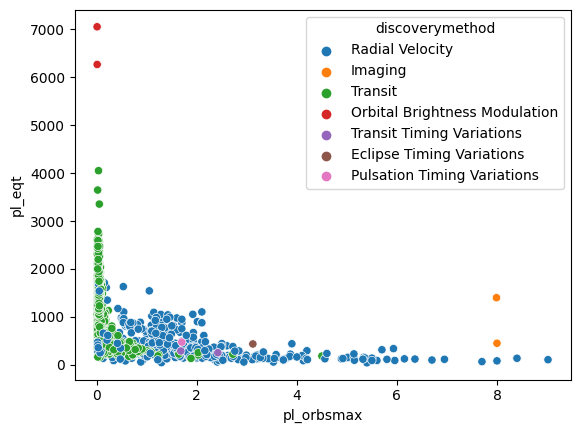

In [65]:
# only look with orbsmax of 10 or lower to better see the data
sns.scatterplot(data=hab[hab['pl_orbsmax'] < 10], x='pl_orbsmax', y='pl_eqt', hue='discoverymethod')

<Axes: xlabel='st_teff', ylabel='st_rad'>

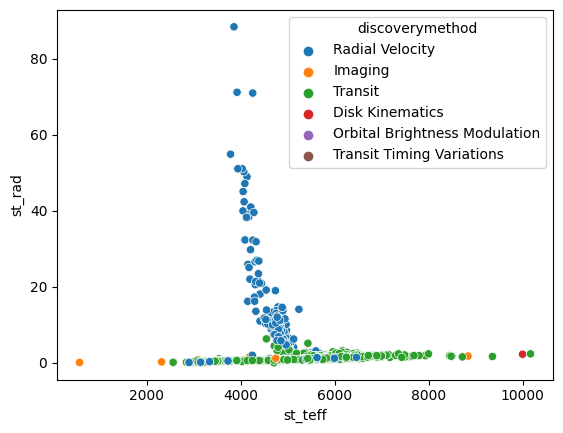

In [66]:
sns.scatterplot(data=hab[hab['st_teff'] < 12000], x='st_teff', y='st_rad', hue='discoverymethod')

<Axes: xlabel='pl_orbsmax', ylabel='pl_eqt'>

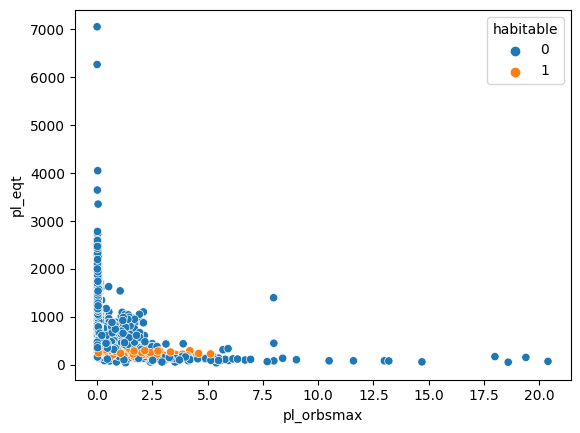

In [67]:
# look at other scatterplots labeld by habitability
sns.scatterplot(data=hab[hab['pl_orbsmax'] < 50], x='pl_orbsmax', y='pl_eqt', hue='habitable')

,pl_name,pl_refname,discoverymethod,pl_orbsmax,pl_eqt,pl_insol,st_teff,st_rad,habitable,hostname,sy_dist
133,GJ 1002 b,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,Radial Velocity,0.04570,231.000000,0.67,3024.0,0.14,1,GJ 1002,4.84867
134,GJ 1002 c,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,Radial Velocity,0.07380,182.000000,0.26,3024.0,0.14,1,GJ 1002,4.84867
136,GJ 1061 c,<a refstr=DREIZLER_ET_AL__2020 href=https://ui...,Radial Velocity,0.03500,278.108524,1.40,2953.0,0.16,1,GJ 1061,3.67278
137,GJ 1061 d,<a refstr=DREIZLER_ET_AL__2020 href=https://ui...,Radial Velocity,0.05400,223.898633,0.60,2953.0,0.16,1,GJ 1061,3.67278
4060,Proxima Cen b,<a refstr=FARIA_ET_AL__2022 href=https://ui.ad...,Radial Velocity,0.04856,216.894011,NaN,2900.0,0.14,1,Proxima Cen,1.30119
4071,Ross 128 b,<a refstr=BONFILS_ET_AL__2018 href=https://ui....,Radial Velocity,0.04960,301.000000,1.38,3192.0,0.20,1,Ross 128,3.37454
4332,Teegarden's Star b,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,Radial Velocity,0.02520,267.249911,1.15,2904.0,0.11,1,Teegarden's Star,3.83078
4333,Teegarden's Star c,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,Radial Velocity,0.04430,201.565396,0.37,2904.0,0.11,1,Teegarden's Star,3.83078
4517,Wolf 1061 c,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,Radial Velocity,0.08900,274.737014,1.30,3342.0,0.31,1,Wolf 1061,4.30592


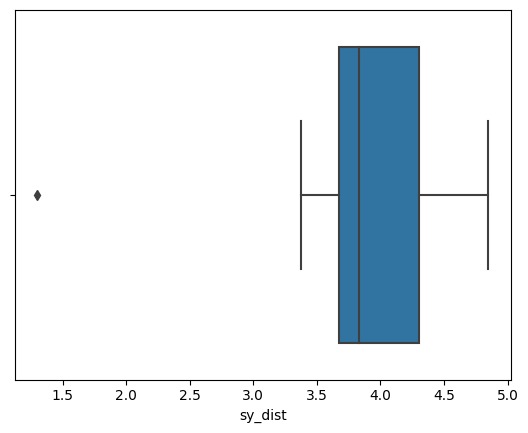

In [68]:
# measured in parsecs, ~ 3.25 light years
#let's look at potentially habitable planets within 10 parsecs
# notice proxima centauri is on there, closest star to us, that planet was one our calculated pl_eqt
# also notice all of these come from radial velocity, best technique to focus on for discovering near planets
# with potential for us to inhabit
near = hab[hab['habitable'] == 1]
near = near[near['sy_dist'] < 5]
sns.boxplot(data=near, x='sy_dist')
near

#### ok so i looked more into proxima centauri b, the closest known exoplanet to us. according to wikipedia https://en.wikipedia.org/wiki/Proxima_Centauri_b it is in the habitable zone of its star, showing that our temperature calculation is probably decent, which is awesome and convenient that the closest is potentially habitable. However, proxima centauri is a red dwarf prone to flares, which produce a lot of radiation, could strip a planets atmosphere and be deadly since it is only .05 au from the star (orbital period of 11 earth days). Also over half the distance from earth as the next potentially habitable exoplanet. The alpha centauri system actually has 3 stars, and a candidate exoplanet that could be in the habitable zone. 

#### checked a couple more. Ross 128 b , teegardens star b and c, GJ 1061 c and d, Wolf 1061 c, GJ 1002 b and c all within habitable zones of their stars, thats the closest 9 to earth and all the ones within 5 parsecs. All but one of these did not have temp before our calculations, shows our temp calculations were good at least for precision.

In [69]:
# basically all of our classifiable exoplanets are from radial velocity and transit
# and only those two plus transit timing variations produce any habitable planets
method = hab.groupby('discoverymethod').count()
method = method[['pl_name']].rename(columns={'pl_name':'count'})
summary  = hab.groupby('discoverymethod').agg({'pl_orbsmax':'mean', 'st_teff': 'mean', 'st_rad':'mean','pl_eqt':'mean','sy_dist':'mean', 'habitable':'mean'})
summary = pd.merge(method, summary, on='discoverymethod')
summary

,count,pl_orbsmax,st_teff,st_rad,pl_eqt,sy_dist,habitable
discoverymethod,,,,,,,
Disk Kinematics,1,130.000000,10000.000000,2.250000,57.948803,183.857000,0.000000
Eclipse Timing Variations,6,3.120000,32375.333333,0.181667,434.794838,516.320167,0.000000
Imaging,12,845.057500,5602.916667,1.305833,718.730648,93.220763,0.000000
Orbital Brightness Modulation,6,0.013667,13236.966667,1.068333,5152.640777,861.393000,0.000000
Pulsation Timing Variations,1,1.700000,29300.000000,0.230000,474.713915,1195.980000,0.000000
Radial Velocity,639,1.488081,5040.159718,4.558091,481.665549,101.257104,0.190923
Transit,3885,0.117606,5427.426914,1.011323,928.180437,646.125970,0.016474
Transit Timing Variations,11,0.569316,5510.181818,1.030909,643.197994,496.481309,0.272727


In [70]:
# see the same statistics but only for habitable planets
isHab = hab[hab['habitable'] ==1]
isHab
method = isHab.groupby('discoverymethod').count()
method = method[['pl_name']].rename(columns={'pl_name':'count'})
summary  = isHab.groupby('discoverymethod').agg({'pl_orbsmax':'mean', 'st_teff': 'mean', 'st_rad':'mean','pl_eqt':'mean','sy_dist':'mean', 'habitable':'mean'})
summary = pd.merge(method, summary, on='discoverymethod')
summary

,count,pl_orbsmax,st_teff,st_rad,pl_eqt,sy_dist,habitable
discoverymethod,,,,,,,
Radial Velocity,122,1.525406,5125.648033,1.440000,239.115343,67.505948,1.0
Transit,64,0.596128,4363.459531,0.667344,263.228568,406.444068,1.0
Transit Timing Variations,3,1.426767,5363.666667,1.076667,277.747019,461.846800,1.0


In [71]:
# what do we learn here? well transit timing produces the highest percentage of habitable planets, but theres 
# 11 of them and they tend to be very far from earth. Same with transit
# radial velocity is the way to go man, gets the most habitable planets, and the ones that are close to earth
# 